In [34]:
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Load, Process, and Explore Data

In [2]:
# Read in csv file
filename = 'credit-data.csv' 
seperator = ','
df = pd.read_csv(filename, sep=seperator)

In [3]:
df.shape   

(150000, 13)

In [4]:
df.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [5]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
# Check if columns have null values
pd.isnull(df).sum() > 0

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [7]:
# Function to fill NA's with median (if integer) and mean (if float). 
# Assuming that median is a better estimate than mean for discrete integer variables.
def fill_missing(colname):
    if df[colname].dtype == np.int64:
        df[colname].fillna(value=df[colname].median(), inplace=True)
    else:
        df[colname].fillna(value=df[colname].mean(), inplace=True)

In [8]:
# fill NAs for all columns
for col in df:
    fill_missing(col)

In [9]:
# confirm that NA's have been filled in
pd.isnull(df).sum() > 0

PersonID                                False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
zipcode                                 False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

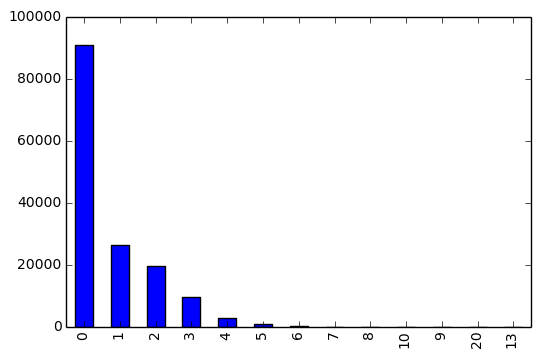

In [10]:
# Convert Number of Dependents to integer
df['NumberOfDependents'] = df['NumberOfDependents'].astype(int)
pd.value_counts(df['NumberOfDependents']).plot(kind='bar')

In [11]:
df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [12]:
# Calculate proportion of serious deliquincy in data
df['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

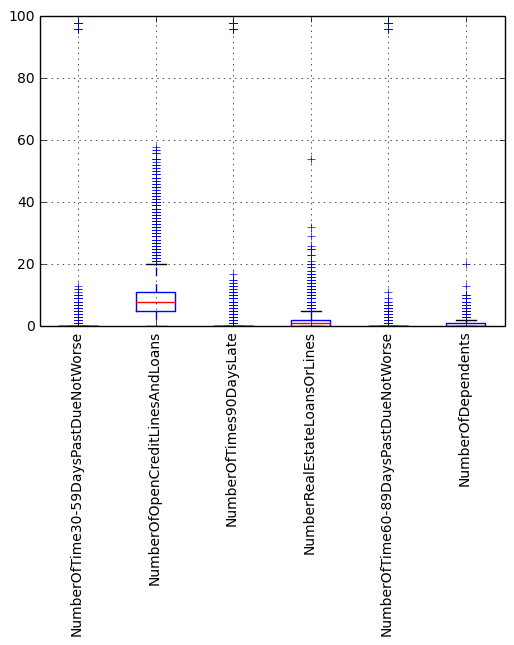

In [13]:
# Plot box and whisker of discrete "count" columns
df.boxplot(column=['NumberOfTime30-59DaysPastDueNotWorse','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'], rot=90)

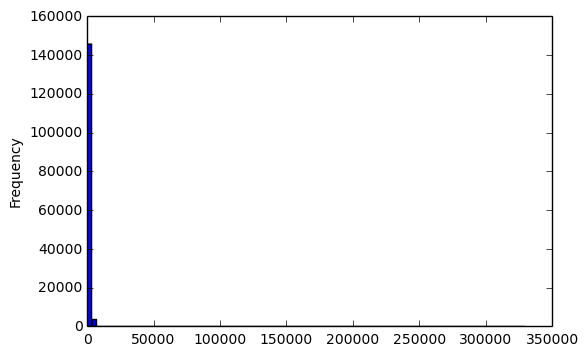

In [14]:
# Plot distribution of Debt Ratio
df['DebtRatio'].plot.hist(bins=100)

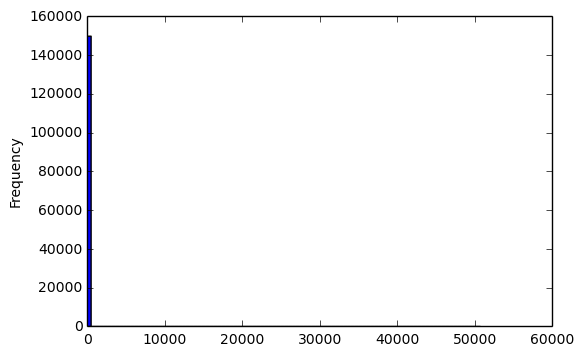

In [15]:
# Plot distribution of RevolvingUtilizationOfUnsecuredLines
df['RevolvingUtilizationOfUnsecuredLines'].plot.hist(bins=100)

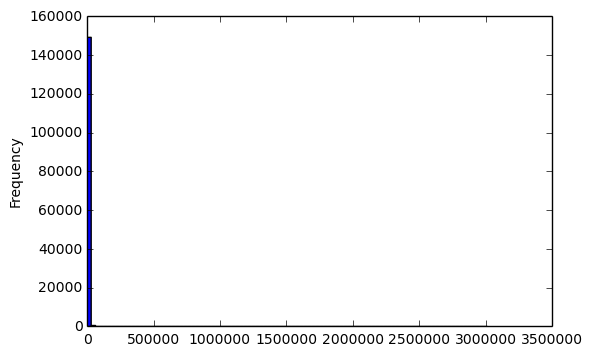

In [16]:
# Plot distribution of monthly income. Spike around average is caused by filling NA with average.
df['MonthlyIncome'].plot.hist(bins=100)

# Generate Features

In [17]:
# Functions for capping features with extreme upper values
def get_ceiling(colname):
    return df[colname].quantile(.999)

def set_ceiling(x, ceiling):
    if x > ceiling:
        return ceiling
    else:
        return x

In [18]:
# Cap relevant columns at ceiling
for c in ['RevolvingUtilizationOfUnsecuredLines','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']:
    ceiling = get_ceiling(c)
    df[c] = df[c].apply(lambda x: set_ceiling(x, ceiling))

In [19]:
# Create age buckets, with larger bins near extremes to capture outliers 
agebins = [0] + list(range(20,80,5)) + [110]
df['bins_age'] = pd.cut(df['age'],bins=agebins, include_lowest=True)
pd.value_counts(df['bins_age'])

(45, 50]     18829
(50, 55]     17861
(55, 60]     16945
(60, 65]     16461
(40, 45]     16208
(35, 40]     13611
(65, 70]     10963
(30, 35]     10728
(75, 110]    10129
(25, 30]      7730
(70, 75]      7507
(20, 25]      3027
[0, 20]          1
Name: bins_age, dtype: int64

In [20]:
# Function for bucketing continuous features into equally-sized groups (by 10% quantiles)
def variable_buckets(colname):
    df['bins_' + colname] = pd.qcut(df[colname], q=10)


In [21]:
# Apply variable bucketing to some continuous features
for c in ['RevolvingUtilizationOfUnsecuredLines','DebtRatio']:
    variable_buckets(c)


In [22]:
# Observe variable bin sizes we just made
display(pd.value_counts(df['bins_RevolvingUtilizationOfUnsecuredLines']))
display(pd.value_counts(df['bins_DebtRatio']))
# Note: unequal number of entities in Debt Ratio bins because of high number of occurrences cut point values

(0.981, 1571.006]    15000
(0.699, 0.981]       15000
(0.445, 0.699]       15000
(0.271, 0.445]       15000
(0.154, 0.271]       15000
(0.0832, 0.154]      15000
(0.0435, 0.0832]     15000
(0.0192, 0.0435]     15000
(0.00297, 0.0192]    15000
[0, 0.00297]         15000
Name: bins_RevolvingUtilizationOfUnsecuredLines, dtype: int64

(0.649, 4]           15108
(0.468, 0.649]       15001
(0.367, 0.468]       15000
(0.287, 0.367]       15000
(0.214, 0.287]       15000
(0.134, 0.214]       15000
(0.0309, 0.134]      15000
[0, 0.0309]          15000
(1267, 10613.074]    14995
(4, 1267]            14896
Name: bins_DebtRatio, dtype: int64

In [23]:
# Generate dummy variables for Number of Dependents
dep_dummies = pd.get_dummies(df['NumberOfDependents'], prefix='dependents')
df = pd.concat([df, dep_dummies], axis=1)

In [24]:
# Generate dummy variables for Age 
age_dummies = pd.get_dummies(df['bins_age'], prefix='age')
df = pd.concat([df, age_dummies], axis=1)
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,...,"age_(30, 35]","age_(35, 40]","age_(40, 45]","age_(45, 50]","age_(50, 55]","age_(55, 60]","age_(60, 65]","age_(65, 70]","age_(70, 75]","age_(75, 110]"
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13.0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4.0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2.0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7.0,0,...,0,0,0,1,0,0,0,0,0,0


## Build and Evaluate Classifier

In [25]:
df.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'bins_age', 'bins_RevolvingUtilizationOfUnsecuredLines',
       'bins_DebtRatio', 'dependents_0.0', 'dependents_1.0', 'dependents_2.0',
       'dependents_3.0', 'dependents_4.0', 'dependents_5.0', 'dependents_6.0',
       'age_[0, 20]', 'age_(20, 25]', 'age_(25, 30]', 'age_(30, 35]',
       'age_(35, 40]', 'age_(40, 45]', 'age_(45, 50]', 'age_(50, 55]',
       'age_(55, 60]', 'age_(60, 65]', 'age_(65, 70]', 'age_(70, 75]',
       'age_(75, 110]'],
      dtype='object')

In [26]:
features = ['NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome','DebtRatio',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'dependents_0.0',
       'dependents_1.0', 'dependents_2.0', 'dependents_3.0',
       'dependents_4.0', 'dependents_5.0', 'dependents_6.0']

In [27]:
# Run logistic regression
X = df[features]
y = df['SeriousDlqin2yrs']
logreg = LogisticRegression()
logreg.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# Observe accuracy score
logreg.score(X, y)

0.93383333333333329

In [29]:
# Compare accuracy score to true percentage in dataset
1-y.mean()

0.93315999999999999

In [30]:
# Observe model coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(logreg.coef_))), columns=['feature', 'coeff'])

,feature,coeff
0,NumberOfTime60-89DaysPastDueNotWorse,[-0.268299345011]
1,MonthlyIncome,[-6.28981184606e-05]
2,DebtRatio,[-4.19716429929e-05]
3,NumberOfOpenCreditLinesAndLoans,[-0.0150579093772]
4,NumberOfTimes90DaysLate,[0.570834150318]
5,NumberRealEstateLoansOrLines,[0.0765392481343]
6,NumberOfTime60-89DaysPastDueNotWorse,[-0.268299345011]
7,dependents_0.0,[-0.728063353776]
8,dependents_1.0,[-0.483946366773]
9,dependents_2.0,[-0.341537349582]


In [33]:
# Clasification report
predictions = logreg.predict(X)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97    139974
          1       0.60      0.03      0.06     10026

avg / total       0.91      0.93      0.91    150000

